
**Assignment 3**

Name: Maherun Nessa Isty

ID: 2021-2-60-086

CSE 366: Artificial Intelligence - Computer Vision Assignment


# **Dataset Information**

In [ ]:
!gdown --id 1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c
From (redirected): https://drive.google.com/uc?id=1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c&confirm=t&uuid=f5368ae4-dae5-4325-990d-6f43fcd90666
To: /content/Original_CoLeaf_Dataset.zip
100% 1.82G/1.82G [00:17<00:00, 103MB/s] 


In [ ]:
!unzip '/content/Original_CoLeaf_Dataset.zip'

Archive:  /content/Original_CoLeaf_Dataset.zip
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (22).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (13).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (30).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (11).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (32).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (18).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (16).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (12).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (20).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (23).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (29).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (21).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (33).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (52).JPG  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (25).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (27).jpg  
  inflati

In [ ]:
import os

input_folder = '/content/Aug/potassium-K'
files = os.listdir(input_folder)
files.sort()  # Sort files for sequential renaming

for i, filename in enumerate(files, start=1):
    # Generate the new name for the file
    new_name = f'aug_potassium-K_({i})'

    # Construct the full paths for the old and new names
    old_path = os.path.join(input_folder, filename)
    new_path = os.path.join(input_folder, f'{new_name}.jpg')  # You can adjust the file extension as needed

    # Rename the file
    os.rename(old_path, new_path)

In [ ]:
# Load images from the subfolder
def count_images(folder_path):
  images = os.listdir(folder_path)
  num_images = len(images)

  return num_images;


In [ ]:
print('The number of images in each folder of Original Coleaf Dataset:')
print('boron-B is: ' , count_images('/content/Original_CoLeaf_Dataset/boron-B'))
print('calcium-Ca is: ' , count_images('/content/Original_CoLeaf_Dataset/calcium-Ca'))
print('iron-Fe is: ' , count_images('/content/Original_CoLeaf_Dataset/iron-Fe'))
print('magnesium-Mg is: ' , count_images('/content/Original_CoLeaf_Dataset/magnesium-Mg'))
print('manganese-Mn is: ' , count_images('/content/Original_CoLeaf_Dataset/manganese-Mn'))
print('nitrogen-N is: ' , count_images('/content/Original_CoLeaf_Dataset/nitrogen-N'))
print('phosphorus-P is: ' , count_images('/content/Original_CoLeaf_Dataset/phosphorus-P'))
print('potassium-K is: ' , count_images('/content/Original_CoLeaf_Dataset/potassium-K'))


The number of images in each folder of Original Coleaf Dataset:
boron-B is:  101
calcium-Ca is:  162
iron-Fe is:  65
magnesium-Mg is:  79
manganese-Mn is:  83
nitrogen-N is:  64
phosphorus-P is:  149
potassium-K is:  96


# **Data Augmetation**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tqdm import tqdm

# Set your main folder path
main_folder_path = '/content/Original_CoLeaf_Dataset'
# Set your output augmented folder path
output_augmented_folder = '/content/Aug'
# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Function to augment images in a subfolder
def augment_images(subfolder_path, output_path, target_count):
    # Make sure the output path exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    # Load images from the subfolder
    images = os.listdir(subfolder_path)
    num_images = len(images)
    # Calculate augmentation factor
    augmentation_factor = target_count // num_images + 1
    # Perform augmentation
    for image in tqdm(images, desc=f'Augmenting {subfolder_path}'):
        img = Image.open(os.path.join(subfolder_path, image))
        img = img.resize((224, 224))
        img_array = np.expand_dims(np.array(img), axis=0)
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_path, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= augmentation_factor:
                break

# Iterate through each subfolder
for subfolder_name in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    output_subfolder_path = os.path.join(output_augmented_folder, subfolder_name)
    # Get the desired number of augmented images
    target_count = max(700, min(800, len(os.listdir(subfolder_path))))
    # Augment images
    augment_images(subfolder_path, output_subfolder_path, target_count)


Augmenting /content/Original_CoLeaf_Dataset/calcium-Ca: 100%|██████████| 162/162 [00:49<00:00,  3.27it/s]
Augmenting /content/Original_CoLeaf_Dataset/manganese-Mn: 100%|██████████| 83/83 [00:28<00:00,  2.87it/s]
Augmenting /content/Original_CoLeaf_Dataset/phosphorus-P: 100%|██████████| 149/149 [00:26<00:00,  5.64it/s]
Augmenting /content/Original_CoLeaf_Dataset/iron-Fe: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]
Augmenting /content/Original_CoLeaf_Dataset/nitrogen-N: 100%|██████████| 64/64 [00:24<00:00,  2.63it/s]
Augmenting /content/Original_CoLeaf_Dataset/potassium-K: 100%|██████████| 96/96 [00:31<00:00,  3.03it/s]
Augmenting /content/Original_CoLeaf_Dataset/magnesium-Mg: 100%|██████████| 79/79 [00:28<00:00,  2.73it/s]
Augmenting /content/Original_CoLeaf_Dataset/boron-B: 100%|██████████| 101/101 [00:30<00:00,  3.35it/s]


In [ ]:
print('The number of images in each folder of Augmented Data:')
print('aug_boron-B is: ' , count_images('/content/Aug/boron-B'))
print('aug_calcium-Ca is: ' , count_images('/content/Aug/calcium-Ca'))
print('aug_iron-Fe is: ' , count_images('/content/Aug/iron-Fe'))
print('aug_magnesium-Mg is: ' , count_images('/content/Aug/magnesium-Mg'))
print('aug_manganese-Mn is: ' , count_images('/content/Aug/manganese-Mn'))
print('aug_nitrogen-N is: ' , count_images('/content/Aug/nitrogen-N'))
print('aug_phosphorus-P is: ' , count_images('/content/Aug/phosphorus-P'))
print('aug_potassium-K is: ' , count_images('/content/Aug/potassium-K'))


The number of images in each folder of Augmented Data:
aug_boron-B is:  670
aug_calcium-Ca is:  768
aug_iron-Fe is:  690
aug_magnesium-Mg is:  691
aug_manganese-Mn is:  622
aug_nitrogen-N is:  687
aug_phosphorus-P is:  720
aug_potassium-K is:  742


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/Aug /content/drive/MyDrive

# Augmented data

In [ ]:
!gdown --id 15Lqz_OzUShCpZCbFj9R6hOLiAXpzQ7bB

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15Lqz_OzUShCpZCbFj9R6hOLiAXpzQ7bB
To: /content/Augmented_CoLeaf_Dataset.zip
100% 24.9M/24.9M [00:00<00:00, 96.5MB/s]


In [ ]:
!unzip '/content/Augmented_CoLeaf_Dataset.zip'

Archive:  /content/Augmented_CoLeaf_Dataset.zip
replace Augmented_CoLeaf_Dataset/aug_boron-B/aug_boron-B_(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Data preprocessing

In [ ]:
import tensorflow as tf
def load_image(path):
    """Load images in their original RGB format and resize to 224x224"""
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    return image

def prepare_dataset(paths, batch_size=32):
    """Prepare a TensorFlow dataset for training or validation"""
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(lambda x: (load_image(x), get_label(x)), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

def get_label(file_path):
    """Parse and one-hot encode the label from the file path, ensuring correct shape"""
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2]
    label_id = label_lookup(label)
    one_hot = tf.one_hot(label_id, depth=8)
    return one_hot

label_names = tf.constant(['aug_boron-B', 'aug_calcium-Ca', 'aug_iron-Fe', 'aug_magnesium-Mg', 'aug_manganese-Mn', 'aug_nitrogen-N', 'aug_phosphorus-P', 'aug_potassium-K'])
label_to_index = tf.range(len(label_names))

def label_lookup(label_name):
    """Map label name to index"""
    idx = tf.where(label_names == label_name)[0][0]  # Correct indexing to get scalar index
    return idx

In [ ]:
import os
# Load and split the dataset
folder_path = '/content/Augmented_CoLeaf_Dataset'
all_files = tf.io.gfile.glob(folder_path + '/*/*')
all_files = tf.random.shuffle(all_files)

train_size = int(0.7 * len(all_files))
val_size = int(0.2 * len(all_files))
test_size = len(all_files) - train_size - val_size

train_files = all_files[:train_size]
val_files = all_files[train_size:train_size + val_size]
test_files = all_files[train_size + val_size:]

train_dataset = prepare_dataset(train_files)
val_dataset = prepare_dataset(val_files)
test_dataset = prepare_dataset(test_files)

#**Model with accuracy**


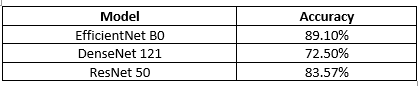

#EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
# Load the EfficientNetB0 model without the top layer:
base_model = EfficientNetB0(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dropout(0.3)(x)  # Add a dropout layer
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

start_time = time.time()
# train the model (replace this with your model)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])
end_time = time.time()

Epoch 1/50
123/123 [==============================] - 27s 123ms/step - loss: 1.3641 - accuracy: 0.5291 - val_loss: 1.0060 - val_accuracy: 0.6878
Epoch 2/50
123/123 [==============================] - 12s 90ms/step - loss: 0.9254 - accuracy: 0.6979 - val_loss: 0.8137 - val_accuracy: 0.7370
Epoch 3/50
123/123 [==============================] - 13s 104ms/step - loss: 0.7852 - accuracy: 0.7418 - val_loss: 0.7232 - val_accuracy: 0.7755
Epoch 4/50
123/123 [==============================] - 11s 90ms/step - loss: 0.7031 - accuracy: 0.7715 - val_loss: 0.6805 - val_accuracy: 0.7782
Epoch 5/50
123/123 [==============================] - 11s 86ms/step - loss: 0.6446 - accuracy: 0.7855 - val_loss: 0.6219 - val_accuracy: 0.8032
Epoch 6/50
123/123 [==============================] - 11s 85ms/step - loss: 0.6060 - accuracy: 0.7950 - val_loss: 0.5926 - val_accuracy: 0.8032
Epoch 7/50
123/123 [==============================] - 11s 87ms/step - loss: 0.5751 - accuracy: 0.8085 - val_loss: 0.5740 - val_accurac

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
efficientnet_time = time.time() - start_time
print(f"EfficientNet model training time: {efficientnet_time}")

18/18 [==============================] - 2s 70ms/step - loss: 0.3127 - accuracy: 0.8911
Test Loss: 0.312725305557251, Test Accuracy: 0.8910714387893677
EfficientNet model training time: 824.7202880382538


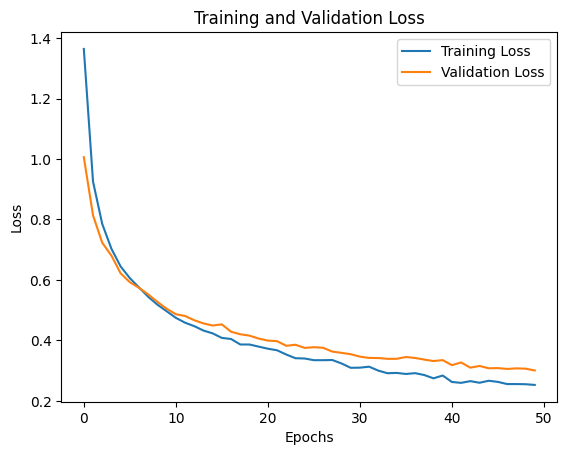

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


18/18 [==============================] - 3s 60ms/step
Precision: 0.8915404797102517
Recall: 0.8891725452223165
F1-Score: 0.8889143989279177


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'] 

# DenseNet 121

In [ ]:
from keras.applications import DenseNet121
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D, Reshape
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os
import time

In [ ]:
# Load the DenseNet121 model without the top layer:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model
start_time = time.time()
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])
end_time = time.time()

Epoch 1/50
123/123 [==============================] - 27s 150ms/step - loss: 3.1215 - accuracy: 0.3190 - val_loss: 1.5784 - val_accuracy: 0.4123
Epoch 2/50
123/123 [==============================] - 16s 130ms/step - loss: 1.3984 - accuracy: 0.4946 - val_loss: 1.2202 - val_accuracy: 0.5751
Epoch 3/50
123/123 [==============================] - 16s 129ms/step - loss: 1.1828 - accuracy: 0.5782 - val_loss: 1.1901 - val_accuracy: 0.5886
Epoch 4/50
123/123 [==============================] - 18s 144ms/step - loss: 1.1026 - accuracy: 0.5959 - val_loss: 1.1036 - val_accuracy: 0.5948
Epoch 5/50
123/123 [==============================] - 17s 133ms/step - loss: 0.9944 - accuracy: 0.6416 - val_loss: 0.9979 - val_accuracy: 0.6431
Epoch 6/50
123/123 [==============================] - 17s 132ms/step - loss: 0.9300 - accuracy: 0.6644 - val_loss: 1.0031 - val_accuracy: 0.6306
Epoch 7/50
123/123 [==============================] - 17s 133ms/step - loss: 0.9077 - accuracy: 0.6792 - val_loss: 0.8696 - val_ac

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
densenet_time = time.time() - start_time
print(f"Densenet model training time: {densenet_time}")

18/18 [==============================] - 2s 92ms/step - loss: 0.7272 - accuracy: 0.7250
Test Loss: 0.7271757125854492, Test Accuracy: 0.7250000238418579
efficientnet_train_time: 463.82912278175354


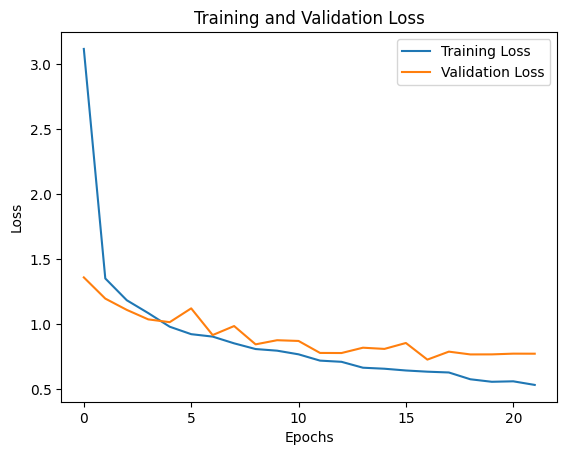

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


18/18 [==============================] - 3s 95ms/step
Precision: 0.7142280065871083
Recall: 0.6987926066399226
F1-Score: 0.6912778962979732


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

# ResNet50

In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D, Reshape
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os

In [ ]:
# Load the ResNet50 model without the top layer:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dropout(0.5)(x)  # Adjust dropout rate
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
123/123 [==============================] - 30s 199ms/step - loss: 1.1924 - accuracy: 0.5716 - val_loss: 0.9456 - val_accuracy: 0.6664
Epoch 2/50
123/123 [==============================] - 17s 133ms/step - loss: 0.7864 - accuracy: 0.7152 - val_loss: 0.7964 - val_accuracy: 0.7254
Epoch 3/50
123/123 [==============================] - 18s 141ms/step - loss: 0.6749 - accuracy: 0.7633 - val_loss: 0.7293 - val_accuracy: 0.7406
Epoch 4/50
123/123 [==============================] - 17s 132ms/step - loss: 0.5957 - accuracy: 0.7904 - val_loss: 0.6676 - val_accuracy: 0.7576
Epoch 5/50
123/123 [==============================] - 17s 133ms/step - loss: 0.5590 - accuracy: 0.8014 - val_loss: 0.6707 - val_accuracy: 0.7478
Epoch 6/50
123/123 [==============================] - 17s 133ms/step - loss: 0.5117 - accuracy: 0.8221 - val_loss: 0.6164 - val_accuracy: 0.7728
Epoch 7/50
123/123 [==============================] - 18s 138ms/step - loss: 0.4661 - accuracy: 0.8400 - val_loss: 0.5784 - val_ac

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 3s 169ms/step - loss: 0.4234 - accuracy: 0.8357
Test Loss: 0.42342832684516907, Test Accuracy: 0.8357142806053162


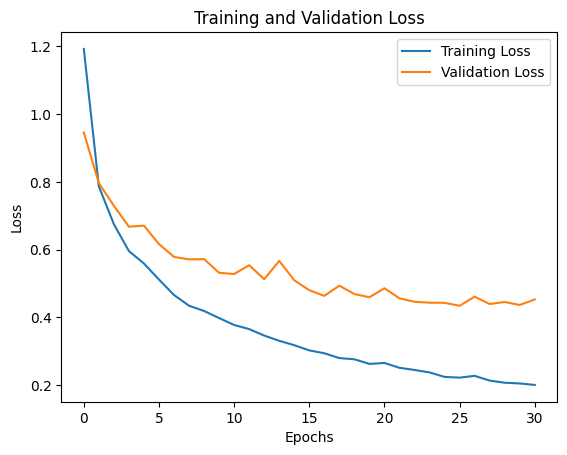

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

18/18 [==============================] - 6s 124ms/step
Precision: 0.057382853245607
Recall: 0.13231026785714287
F1-Score: 0.06954532537652741


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 group_normalization_3 (Gro  (None, 222, 222, 32)      64        
 upNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                           